In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo
import os
import os.path as path
import wget

In [3]:
path = "data_csv/Datos_"
colors = ["b","g","y","r"]

In [4]:
def GetRegression(x,y):
    m,b = np.polyfit(x,y,1)
    X = np.linspace(min(x),max(x),100)
    Y = m*X + b
    return X,Y,m,b

def GetUncertainty(m,b,x,y):
    Sum = np.sum((y - m*x - b)**2)
    N_2 = len(y)-2
    S_y = np.sqrt(Sum/N_2)
    N = len(y)
    denominator = N*np.sum(x**2) - (np.sum(x))**2
    S_m = S_y*np.sqrt(N/denominator)
    S_b = S_y*np.sqrt(np.sum(x**2)/denominator)
    un_M = S_m
    un_B =S_b
    return un_M,un_B

In [5]:
file = ["B","G","Y","R","IR"]
Data = [None,None,None,None,None]

In [6]:
for i in range(5):
    Data[i] = pd.read_csv(path+file[i]+".csv",sep=";")

In [7]:
I = [None,None,None,None,None]
V = [None,None,None,None,None]

I_err = np.ones(21)*0.25e-8
V_err = np.ones(21)*1e-3


for i in range(5):
    I[i] = np.flip(np.array(Data[i]["Intensidad"],dtype=float)*1e-8)
    V[i] = np.flip(np.array(Data[i]["Voltaje"],dtype=float))

0.9908867776068399
0.9972369757841537
0.9551316717005295
0.9634916646023057


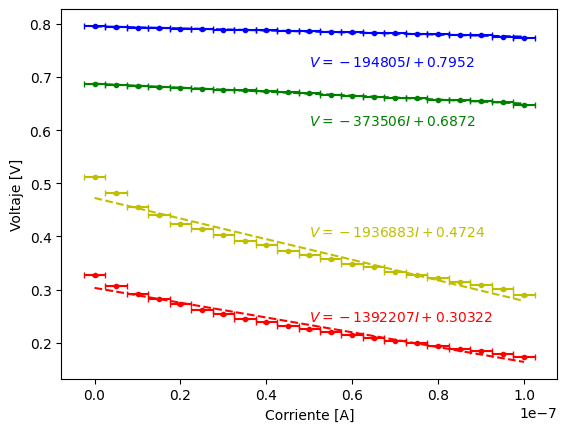

[-194805.19480518965, -373506.49350649, -1936883.1168831154, -1392207.7922077908] [0.7952640692640691, 0.6872943722943722, 0.4724155844155843, 0.3032294372294371]
[ 4285.95592986  4510.39435683 96308.56999186 62172.63795164] [0.00025052 0.00026364 0.00562945 0.00363413]


array([0.00000000e+00, 1.01010101e-09, 2.02020202e-09, 3.03030303e-09,
       4.04040404e-09, 5.05050505e-09, 6.06060606e-09, 7.07070707e-09,
       8.08080808e-09, 9.09090909e-09, 1.01010101e-08, 1.11111111e-08,
       1.21212121e-08, 1.31313131e-08, 1.41414141e-08, 1.51515152e-08,
       1.61616162e-08, 1.71717172e-08, 1.81818182e-08, 1.91919192e-08,
       2.02020202e-08, 2.12121212e-08, 2.22222222e-08, 2.32323232e-08,
       2.42424242e-08, 2.52525253e-08, 2.62626263e-08, 2.72727273e-08,
       2.82828283e-08, 2.92929293e-08, 3.03030303e-08, 3.13131313e-08,
       3.23232323e-08, 3.33333333e-08, 3.43434343e-08, 3.53535354e-08,
       3.63636364e-08, 3.73737374e-08, 3.83838384e-08, 3.93939394e-08,
       4.04040404e-08, 4.14141414e-08, 4.24242424e-08, 4.34343434e-08,
       4.44444444e-08, 4.54545455e-08, 4.64646465e-08, 4.74747475e-08,
       4.84848485e-08, 4.94949495e-08, 5.05050505e-08, 5.15151515e-08,
       5.25252525e-08, 5.35353535e-08, 5.45454545e-08, 5.55555556e-08,
      

In [18]:
M,B = [0,0,0,0],[0,0,0,0]
V_frenado = np.array([])
wave_lenght = np.array([469,567,590,659])
wlen = wave_lenght*1e-9

for i in range(4):
    X,Y,M[i],B[i] = GetRegression(I[i],V[i])
    mean_V = np.sum(V[i])/len(V[i])
    reg_V = M[i]*I[i] + B[i]
    SS_res = np.sum((V[i] - reg_V)**2)
    SS_tot = np.sum((V[i] - mean_V)**2)
    Rp2 = 1 - SS_res/SS_tot
    print(Rp2)
    plt.errorbar(I[i],V[i],color=colors[i],yerr=V_err,xerr=I_err,fmt=".",capsize=2)
    plt.plot(X,Y,"%s--"%(colors[i]))
    V_frenado = np.append(V_frenado,B[i])
    plt.xlabel("Corriente [A]")
    plt.ylabel("Voltaje [V]")
    


plt.text(0.5e-7,0.72,r"$V = -194805I + 0.7952$",color="b")

plt.text(0.5e-7,0.61,r"$V = -373506I + 0.6872}$",color="g")

plt.text(0.5e-7,0.4,r"$V = -1936883I + 0.4724$",color="y")

plt.text(0.5e-7,0.24,r"$V = -1392207I + 0.30322$",color="r")

plt.show()

print(M,B)

uncertainty_M,uncertainty_B = np.ones(4),np.ones(4)

for i in range(4):
    uncertainty_M[i], uncertainty_B[i] = GetUncertainty(M[i],B[i],I[i],V[i])

print(uncertainty_M,uncertainty_B)

X

Incertidumbre de m: 1.311110299267077e-34. Incertidumbre de b: 7.040121855477441e-20
Valor de m: 4.151294571079577e-34. Valor de b: -1.307085650940179e-19


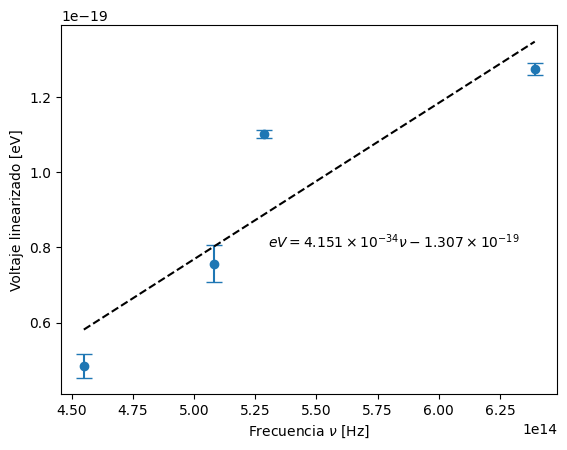

In [9]:
e = 1.60217663e-19
c = 2.99792458e8
frequency =c/wlen
V_f = np.array(V_frenado)*e
dV_f = np.array([0.01,0.007,0.03,0.02])*e
plt.errorbar(frequency,V_f,dV_f,fmt="o",capsize=6)


plt.xlabel(r"Frecuencia $\nu$ [Hz]")
plt.ylabel(r"Voltaje linearizado [eV]")
plt.text(5.3e14,0.8e-19,r"$eV = 4.151\times10^{-34}\nu - 1.307\times10^{-19}$")
X,Y,m,b = GetRegression(frequency,V_f)
plt.plot(X,Y,"k--")

print("Incertidumbre de m: %s. Incertidumbre de b: %s"%(GetUncertainty(m,b,frequency,V_f)))
print("Valor de m: %s. Valor de b: %s"%(m,b))

-1484155.8441558438 0.2842554112554112


(61483.592628118706, 0.0035938549249712186)

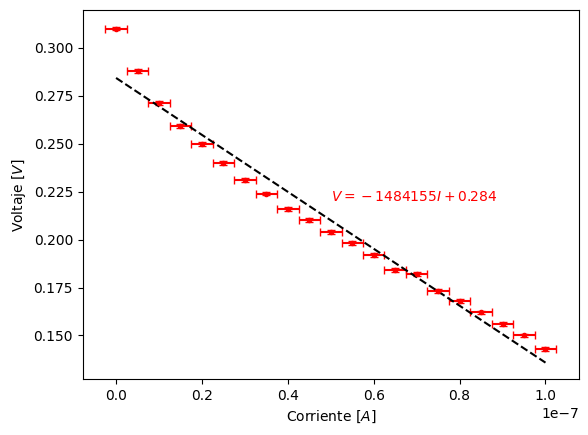

In [10]:
plt.errorbar(I[4],V[4],color="r",yerr=V_err,fmt=".",xerr=I_err,capsize=3)
plt.ylabel(r"Voltaje [$V$]")
plt.xlabel(r"Corriente [$A$]")

X,Y,m,b = GetRegression(I[4],V[4])
x = np.linspace(min(X),max(X))
y = m*x + b
plt.plot(x,y,"k--",)
plt.text(np.mean(X),np.mean(Y)+0.01,r"$V = -1484155I + 0.284$",color="r")
print(m,b)
GetUncertainty(m,b,I[4],V[4])